In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv("C:\\Users\\jamie\\Untitled Folder 1\\Human_Activity_Dataset\\Seizure\\ds\\mergedfiles1.txt", header = None, names = columns)
df = df.dropna()
print(columns)

C:\Users\jamie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']


In [3]:
df.tail()

,user,activity,timestamp,x-axis,y-axis,z-axis
1272860,10,Lie down,6.378112e+13,-1.340,9.268,3.447
1272861,10,Lie down,6.378117e+13,-1.264,9.229,3.143
1272862,10,Lie down,6.378122e+13,-1.187,8.952,3.974
1272863,10,Lie down,6.378127e+13,-1.199,8.818,4.254
1272864,10,Lie down,6.378132e+13,-1.216,9.012,3.84


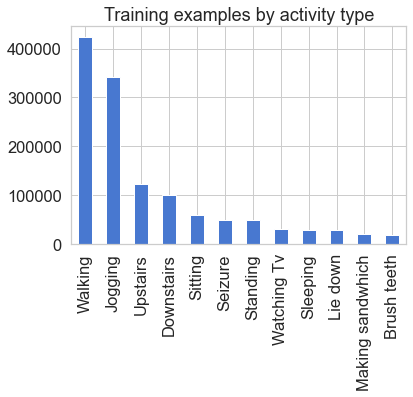

In [4]:
df['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

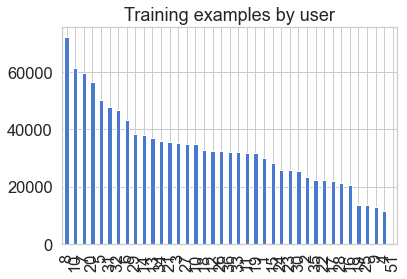

In [5]:
df['user'].value_counts().plot(kind='bar', title='Training examples by user');

In [6]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:500]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
        
        
# Last column has a ";" character which must be removed ...
    df['z-axis'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df['z-axis'] = df['z-axis'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df.dropna(axis=0, how='any', inplace=True)


def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan


df.head()


,user,activity,timestamp,x-axis,y-axis,z-axis
0,5,Watching Tv,8.117712e+12,2.232,7.699,3.546
1,5,Watching Tv,8.117762e+12,1.869,6.957,3.487
2,5,Watching Tv,8.117812e+12,2.251,6.255,3.589
3,5,Watching Tv,8.117862e+12,2.403,5.457,3.174
4,5,Watching Tv,8.117912e+12,2.220,4.784,2.145


C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDepreca

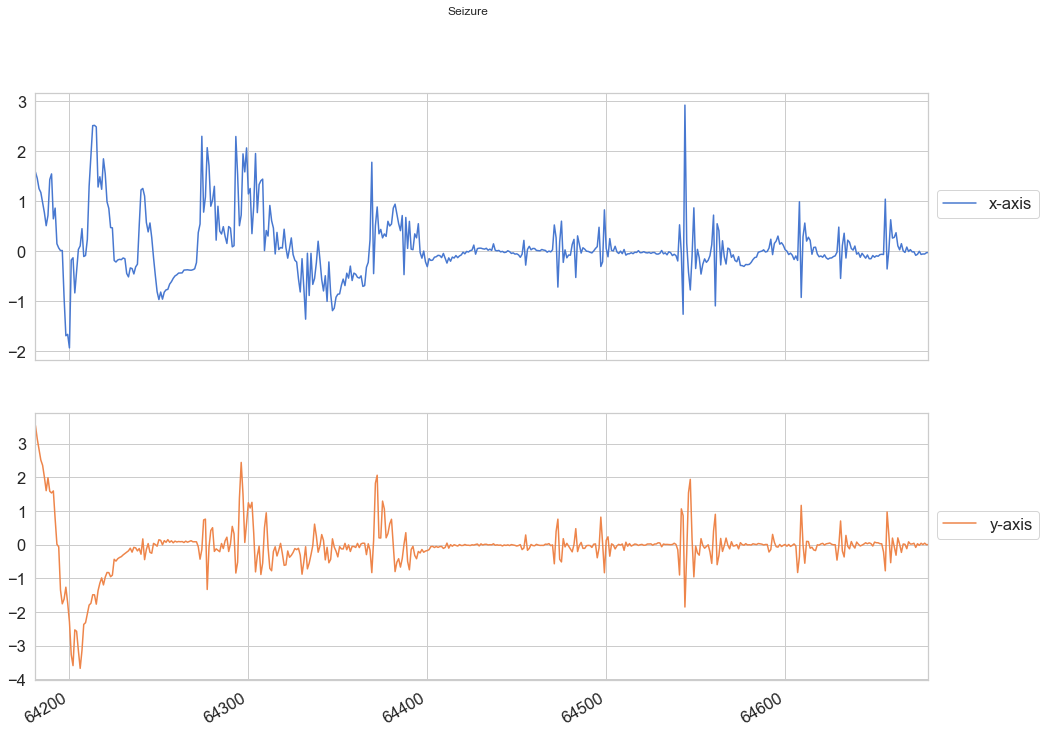

In [7]:
plot_activity("Seizure", df)


C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\jamie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDepreca

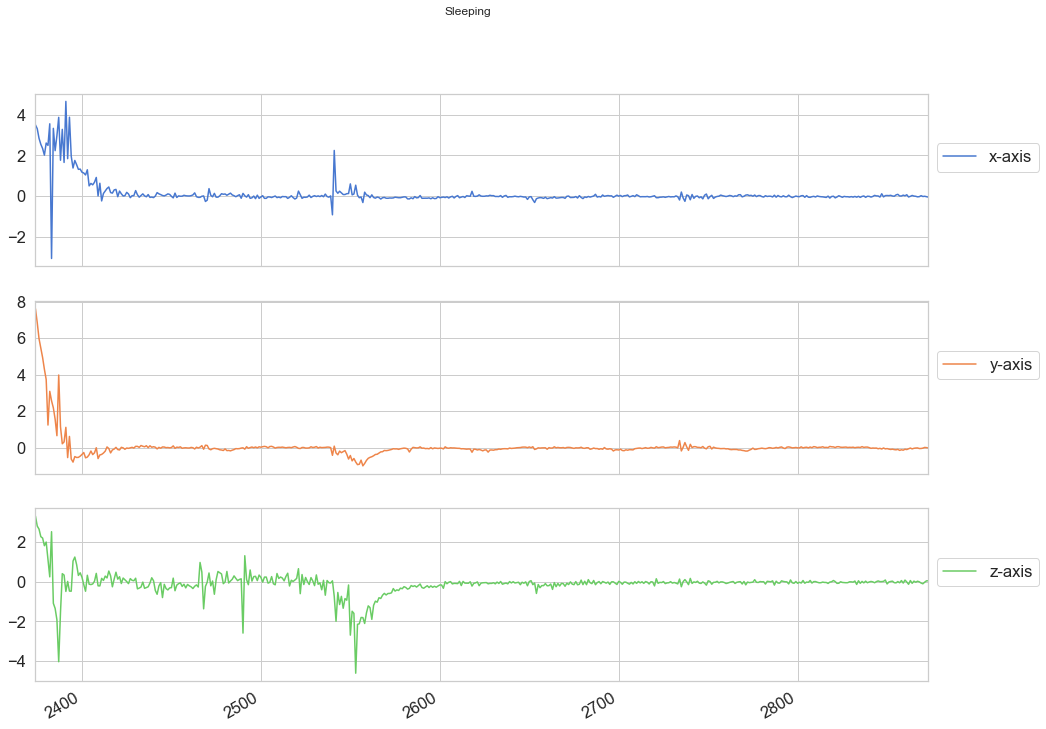

In [8]:
plot_activity("Sleeping", df)

In [10]:
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

In [11]:
np.array(segments).shape

(63634, 3, 200)

In [12]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [13]:
reshaped_segments.shape

(63634, 200, 3)

In [14]:
labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [18]:
len(X_train)
len(X_test)

12727

# Building the model

In [24]:
N_CLASSES = 12
N_HIDDEN_UNITS = 64

In [25]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [26]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [27]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

W0924 11:06:27.920874 29768 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0924 11:06:27.921870 29768 deprecation.py:323] From <ipython-input-25-c8ae7df74e6e>:17: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0924 11:06:27.922868 29768 deprecation.py:323] From <ipython-input-25-c8ae7df74e6e>:18: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is

In [28]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

W0924 11:06:32.924809 29768 deprecation.py:323] From <ipython-input-28-4720b2143aa0>:6: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [29]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

# Training

In [30]:
print("Yay")

Yay


In [31]:
N_EPOCHS = 50
BATCH_SIZE = 1024
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)


for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})
        
    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue
    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

epoch: 1 test accuracy: 0.7444802522659302 loss: 1.754422664642334
epoch: 10 test accuracy: 0.8874832987785339 loss: 0.8259822130203247
epoch: 20 test accuracy: 0.9288127422332764 loss: 0.5343778729438782
epoch: 30 test accuracy: 0.9340771436691284 loss: 0.4414253830909729
epoch: 40 test accuracy: 0.9446059465408325 loss: 0.38219016790390015
epoch: 50 test accuracy: 0.9445273876190186 loss: 0.35765498876571655

final results: accuracy: 0.9445273876190186 loss: 0.35765498876571655


In [61]:

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score




total1=sum(sum(cm))
print("\nTotal Predictions:", total1)

print ('\nAccuracy Score: ', acc_final)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nSpecificity : ', specificity1)

TypeError: 'function' object is not iterable

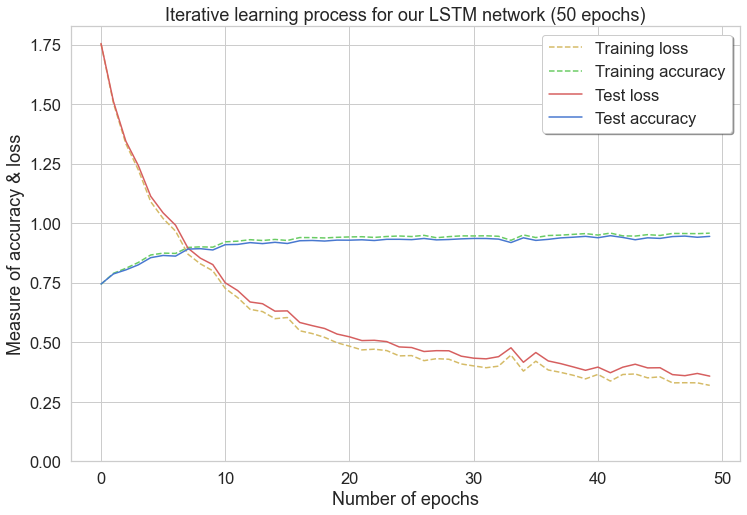

In [62]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "y--", label="Training loss")
plt.plot(np.array(history['train_acc']), "g--", label="Training accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "b-", label="Test accuracy")

plt.title('Iterative learning process for our LSTM network (50 epochs)')
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Measure of accuracy & loss')
plt.xlabel('Number of epochs')
plt.ylim(0)

plt.show()

In [63]:
LABELS = ['Brush teeth','Downstairs','Jogging','Lie down','Making sandwhich','Seizure','Sitting','Sleeping', 'Standing','Upstairs','Walking','Watching Tv']



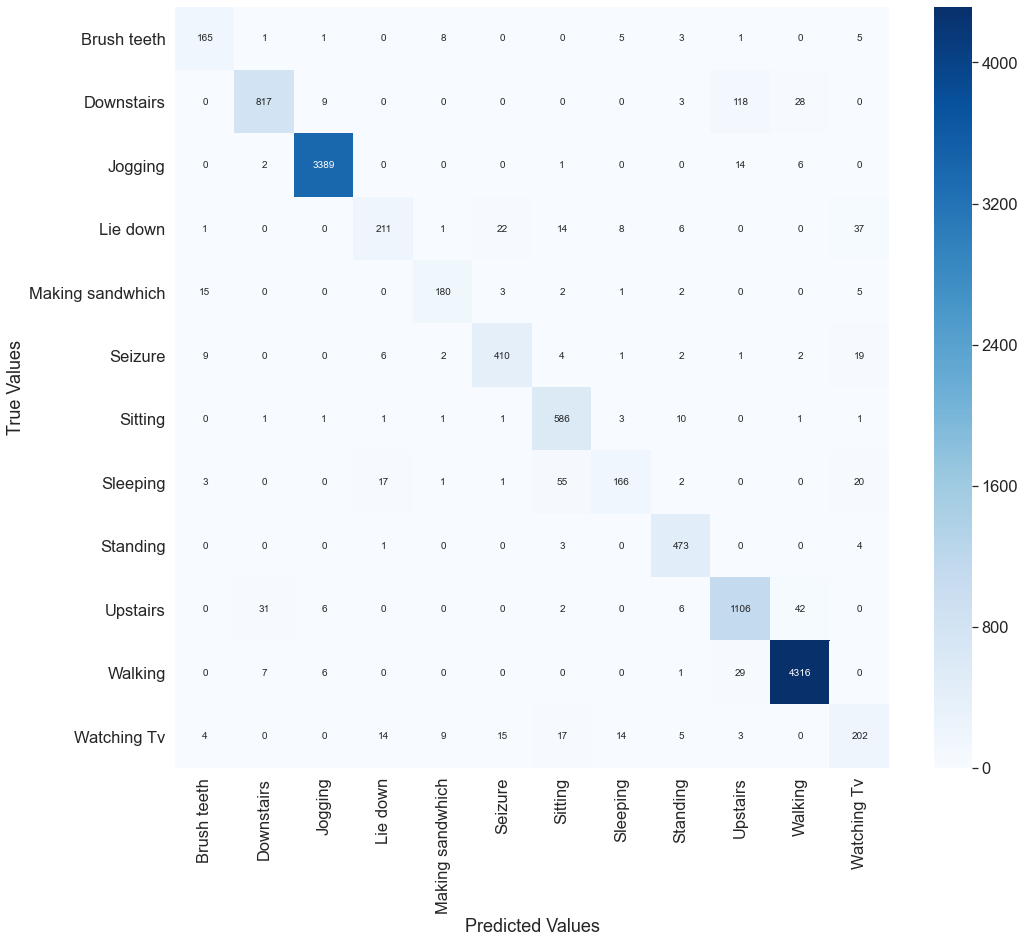


Sensitivity :  0.9939759036144579

Specificity :  1.0


In [64]:
#Confusion Matrix,
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap=plt.cm.Blues);
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show();





sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('\nSpecificity : ', specificity1)

In [66]:
# Take the class with the highest probability from the test predictions
#max_test = np.argmax(y_pred_test, axis=1)
#max_y_test = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(max_test, max_predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       189
           1       0.95      0.84      0.89       975
           2       0.99      0.99      0.99      3412
           3       0.84      0.70      0.77       300
           4       0.89      0.87      0.88       208
           5       0.91      0.90      0.90       456
           6       0.86      0.97      0.91       606
           7       0.84      0.63      0.72       265
           8       0.92      0.98      0.95       481
           9       0.87      0.93      0.90      1193
          10       0.98      0.99      0.99      4359
          11       0.69      0.71      0.70       283

    accuracy                           0.94     12727
   macro avg       0.88      0.86      0.87     12727
weighted avg       0.94      0.94      0.94     12727



In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity


from sklearn.metrics import confusion_matrix

cm1 = metrics.confusion_matrix(max_test, max_predictions)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)